## Text Classification Using Naive Bayes

### Overview

Text classification involves categorizing text data into predefined labels or classes. Naive Bayes is a widely used algorithm for this task due to its simplicity and efficiency.

### Naive Bayes Algorithm

Naive Bayes is a probabilistic classifier based on Bayes' Theorem. It operates under the assumption that features (e.g., words) are independent of each other given the class label. Despite this simplifying assumption, it often performs well in practice.

### Key Types

1. **Multinomial Naive Bayes**: Ideal for text where features are word counts or frequencies. Commonly used for document classification.

2. **Bernoulli Naive Bayes**: Suitable when features are binary, indicating the presence or absence of words.

3. **Complement Naive Bayes**: Designed to handle imbalanced datasets by correcting class imbalances.

### Advantages

- **Simple and Fast**: Easy to implement and computationally efficient.
- **Effective with High-Dimensional Data**: Works well with large feature sets like text data.
- **Requires Less Training Data**: Performs effectively even with smaller datasets.

### Applications

- **Spam Detection**: Identifying spam emails versus legitimate ones.
- **Sentiment Analysis**: Determining the sentiment (positive, negative, neutral) of text.
- **Topic Classification**: Assigning documents to specific topics or categories.

### Conclusion

Naive Bayes is a robust and straightforward method for text classification. Its effectiveness in handling text data and simplicity in implementation make it a popular choice for various NLP tasks.


In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words =  set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
#Load the dataset
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Inspecting data
df.shape

(50000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

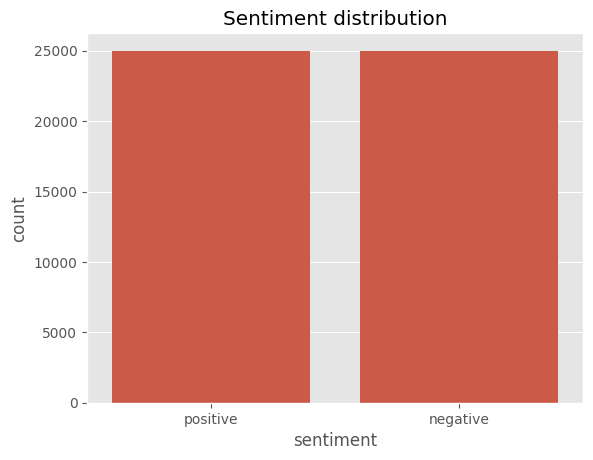

In [5]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [6]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [7]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [8]:
df['word count'] = df['review'].apply(no_of_words)

In [9]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


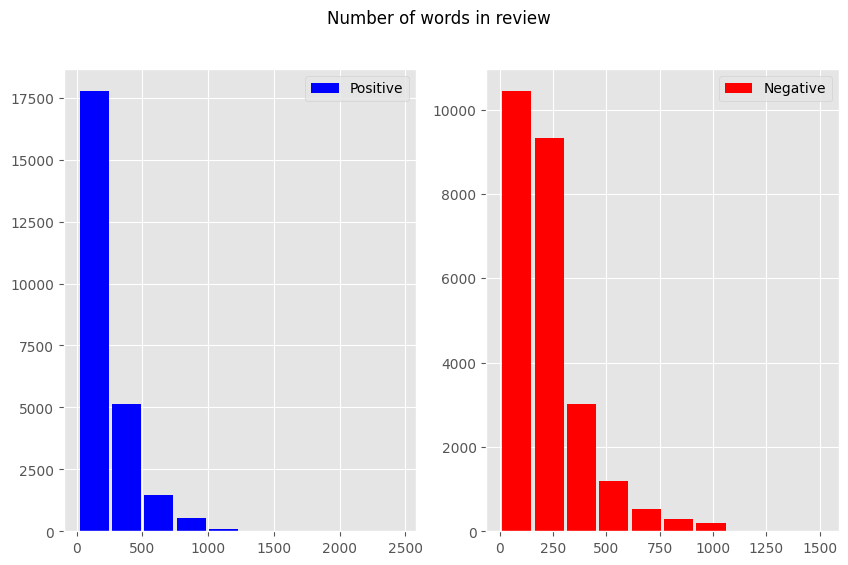

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

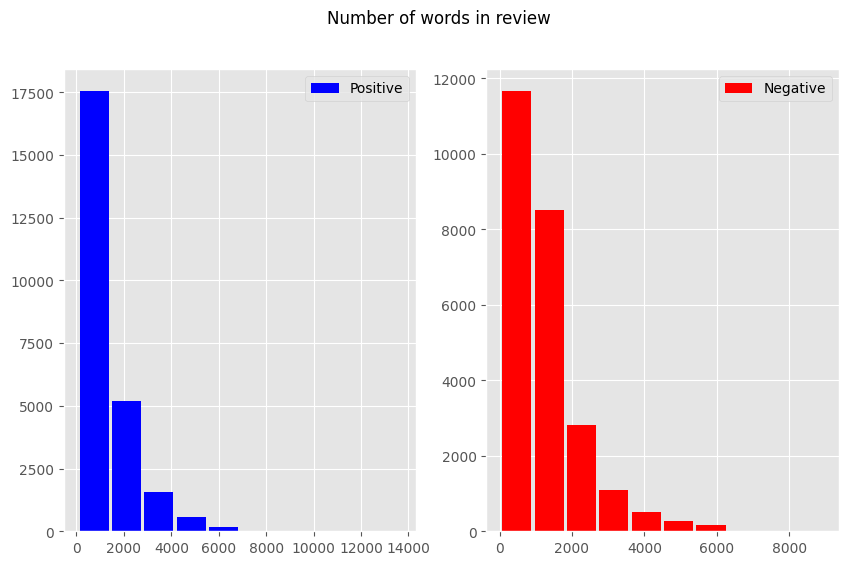

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [13]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14028\958894597.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sentiment.replace("positive", 1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14028\958894597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [14]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [15]:
# Data Preprocessing
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [16]:
df.review = df['review'].apply(data_processing)

In [17]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [18]:
df = df.drop_duplicates('review')

In [19]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [20]:
df.review = df['review'].apply(lambda x: stemming(x))

In [21]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,2,67
4,petter matteis love time money visually stunni...,1,125


In [22]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


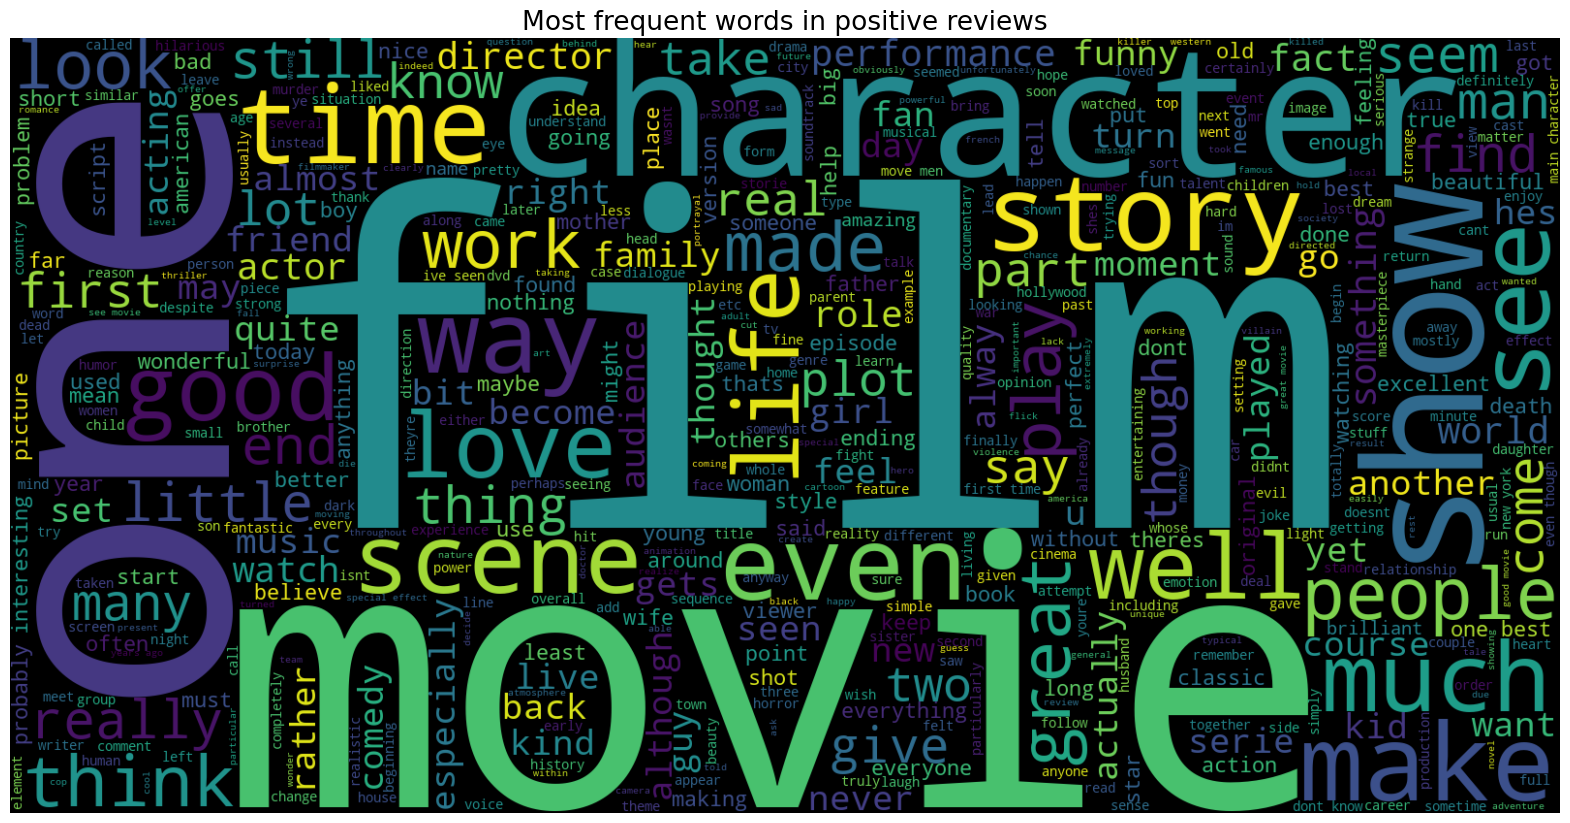

In [23]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [24]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [25]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


In [26]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'word=%{y}<br>count=%{x}<extra></extra>',
              'legendgroup': 'film',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'film',
              'offsetgroup': 'film',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([39285]),
              'xaxis': 'x',
              'y': array(['film'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'word=%{y}<br>count=%{x}<extra></extra>',
              'legendgroup': 'movie',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'movie',
              'offsetgroup': 'movie',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([35830]),
              'xaxis': 'x',
              'y': array(['movie'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'word=%{y}<br>count=%{x}<extra></extra>',
              'legendgroup': 'one',
              'marker': {'color': '#00cc96', 'pattern': {'shape': ''}},
              'name': 'one',
              'offsetgroup': 'one',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([25621]),
              'xaxis': 'x',
              'y': array(['one'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'word=%{y}<br>count=%{x}<extra></extra>',
              'legendgroup': 'like',
              'marker': {'color': '#ab63fa', 'pattern': {'shape': ''}},
              'name': 'like',
              'offsetgroup': 'like',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([16998]),
              'xaxis': 'x',
              'y': array(['like'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'word=%{y}<br>count=%{x}<extra></extra>',
              'legendgroup': 'good',
              'marker': {'color': '#FFA15A', 'pattern': {'shape': ''}},
              'name': 'good',
              'offsetgroup': 'good',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([14281]),
              'xaxis': 'x',
              'y': array(['good'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'word=%{y}<br>count=%{x}<extra></extra>',
              'legendgroup': 'great',
              'marker': {'color': '#19d3f3', 'pattern': {'shape': ''}},
              'name': 'great',
              'offsetgroup': 'great',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([12568]),
              'xaxis': 'x',
              'y': array(['great'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'word=%{y}<br>count=%{x}<extra></extra>',
              'legendgroup': 'story',
              'marker': {'color': '#FF6692', 'pattern': {'shape': ''}},
              'name': 'story',
              'offsetgroup': 'story',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([12338]),
              'xaxis': 'x',
              'y': array(['story'], dtype=object),
              'yaxis': 'y'},
             {'alignm

In [27]:
neg_reviews =  df[df.sentiment == 2]
neg_reviews.head()

,review,sentiment,word count
3,basically theres family little boy jake thinks...,2,67
7,show amazing fresh innovative idea 70s first a...,2,83
8,encouraged positive comments film looking forw...,2,64
10,phil alien one quirky films humour based aroun...,2,51
11,saw movie 12 came recall scariest scene big bi...,2,84


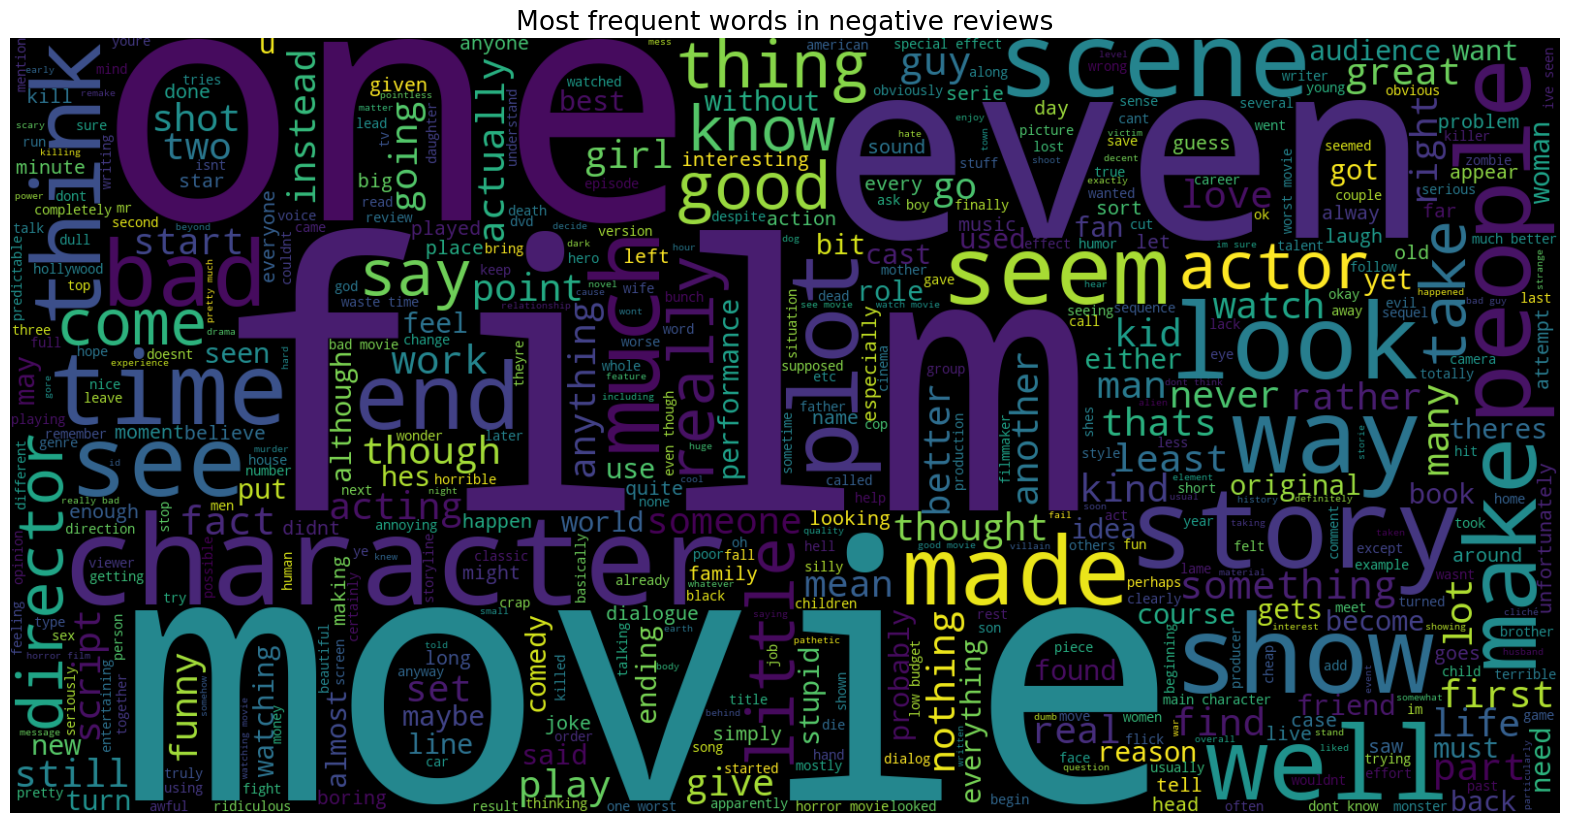

In [28]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()


In [29]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [30]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()


,word,count
0,movie,47001
1,film,34651
2,one,24361
3,like,21508
4,even,14759


In [31]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'word=%{y}<br>count=%{x}<extra></extra>',
              'legendgroup': 'movie',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'movie',
              'offsetgroup': 'movie',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([47001]),
              'xaxis': 'x',
              'y': array(['movie'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'word=%{y}<br>count=%{x}<extra></extra>',
              'legendgroup': 'film',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'film',
              'offsetgroup': 'film',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([34651]),
              'xaxis': 'x',
              'y': array(['film'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'word=%{y}<br>count=%{x}<extra></extra>',
              'legendgroup': 'one',
              'marker': {'color': '#00cc96', 'pattern': {'shape': ''}},
              'name': 'one',
              'offsetgroup': 'one',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([24361]),
              'xaxis': 'x',
              'y': array(['one'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'word=%{y}<br>count=%{x}<extra></extra>',
              'legendgroup': 'like',
              'marker': {'color': '#ab63fa', 'pattern': {'shape': ''}},
              'name': 'like',
              'offsetgroup': 'like',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([21508]),
              'xaxis': 'x',
              'y': array(['like'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'word=%{y}<br>count=%{x}<extra></extra>',
              'legendgroup': 'even',
              'marker': {'color': '#FFA15A', 'pattern': {'shape': ''}},
              'name': 'even',
              'offsetgroup': 'even',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([14759]),
              'xaxis': 'x',
              'y': array(['even'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'word=%{y}<br>count=%{x}<extra></extra>',
              'legendgroup': 'good',
              'marker': {'color': '#19d3f3', 'pattern': {'shape': ''}},
              'name': 'good',
              'offsetgroup': 'good',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([13995]),
              'xaxis': 'x',
              'y': array(['good'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'word=%{y}<br>count=%{x}<extra></extra>',
              'legendgroup': 'bad',
              'marker': {'color': '#FF6692', 'pattern': {'shape': ''}},
              'name': 'bad',
              'offsetgroup': 'bad',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([13903]),
              'xaxis': 'x',
              'y': array(['bad'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': '

In [32]:
X = df['review']
Y = df['sentiment']

In [41]:
vect = TfidfVectorizer()
X_tfidf = vect.fit_transform(df['review'])

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, Y, test_size=0.3, random_state=42)

In [43]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 221707)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221707)
Size of y_test:  (14874,)


In [44]:
# Import Required Libraries
from sklearn.naive_bayes import MultinomialNB , BernoulliNB , ComplementNB
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , classification_report

In [45]:
# Initialize and Train Models
models = {
    'MultinomialNB' : MultinomialNB(),
    'BernoulliNB' : BernoulliNB(),
    'ComplementNB' : ComplementNB()
}

results = {}

In [46]:
# Evaluate Models
for name , model in models.items():

    #Train the model
    model.fit(x_train , y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': report
    }

#Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1_score']:.4f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("Classification Report:")
    print(metrics['classification_report'])
    print("-" * 80)


Model: MultinomialNB
Accuracy: 0.8644
Precision: 0.8645
Recall: 0.8644
F1 Score: 0.8644
Confusion Matrix:
[[6439 1074]
 [ 943 6418]]
Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.86      0.86      7513
           2       0.86      0.87      0.86      7361

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874

--------------------------------------------------------------------------------
Model: BernoulliNB
Accuracy: 0.8504
Precision: 0.8518
Recall: 0.8504
F1 Score: 0.8503
Confusion Matrix:
[[6177 1336]
 [ 889 6472]]
Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.82      0.85      7513
           2       0.83      0.88      0.85      7361

    accuracy                           0.85     14874
   macro avg       0.85      0.85      0.85     14874
weighted a

In [48]:
from sklearn.naive_bayes import MultinomialNB

best_model = MultinomialNB()
best_model.fit(x_train, y_train)

MultinomialNB()

In [49]:
import joblib

#Assuming best_model is your trained model
joblib.dump(best_model , 'best_model.pkl')

# Save the vectorizer
joblib.dump(vect, 'tfidf_vectorizer.sav')

['tfidf_vectorizer.sav']